In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv('H:/emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


<AxesSubplot:xlabel='label', ylabel='count'>

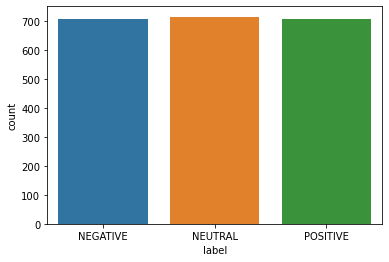

In [4]:
import seaborn as sns
sns.countplot(x='label', data=df)

In [5]:
df.isnull().sum()
# no missing values

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

In [6]:
encode = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
#new dataset with replaced values
df_encoded = df.replace(encode)

print(df_encoded.head())
print(df_encoded['label'].value_counts())


   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [7]:

df_encoded['label'].unique()

array([2, 0, 1], dtype=int64)

In [8]:
df_encoded.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,0


In [9]:
x=df_encoded.drop(["label"]  ,axis=1)
x.shape

(2132, 2548)

In [10]:
y = df_encoded.loc[:,'label'].values
y.shape

(2132,)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [12]:
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0],1,x.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,x.shape[1]))

In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,2548),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
# model.add(LSTM(100,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             668928    
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 681,443
Trainable params: 681,443
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, epochs = 100, validation_data= (x_test, y_test))
score, acc = model.evaluate(x_test, y_test)

Epoch 1/100
54/54 [==============================] - 2s 12ms/step - loss: 0.5956 - accuracy: 0.7977 - val_loss: 0.3654 - val_accuracy: 0.9180
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3100 - accuracy: 0.9337 - val_loss: 0.2803 - val_accuracy: 0.9180
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 0.2199 - accuracy: 0.9431 - val_loss: 0.2191 - val_accuracy: 0.9344
Epoch 4/100
54/54 [==============================] - 0s 6ms/step - loss: 0.1894 - accuracy: 0.9443 - val_loss: 0.1975 - val_accuracy: 0.9321
Epoch 5/100
54/54 [==============================] - 0s 6ms/step - loss: 0.1487 - accuracy: 0.9630 - val_loss: 0.1980 - val_accuracy: 0.9227
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: 0.1246 - accuracy: 0.9683 - val_loss: 0.1661 - val_accuracy: 0.9368
Epoch 7/100
54/54 [==============================] - 0s 6ms/step - loss: 0.1064 - accuracy: 0.9730 - val_loss: 0.1513 - val_accuracy: 0.9391
Epoch 8/100


Epoch 59/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1615 - val_accuracy: 0.9696
Epoch 60/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1892 - val_accuracy: 0.9672
Epoch 61/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.1694 - val_accuracy: 0.9672
Epoch 62/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.1854 - val_accuracy: 0.9625
Epoch 63/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.2100 - val_accuracy: 0.9625
Epoch 64/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.9947 - val_loss: 0.2667 - val_accuracy: 0.9508
Epoch 65/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.1395 - val_accuracy: 0.9742
Epoch 

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [42]:
# Getting things ready to print classification report
pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)


In [43]:
print("Expected: ",expected_classes)
print("Predicted: ",predict_classes)


Expected:  [1 1 1 2 1 1 2 1 2 1 2 2 2 1 2 1 2 0 0 0 0 1 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0
 1 1 2 1 0 2 2 0 2 1 1 0 2 0 1 1 1 2 0 2 0 2 2 1 0 1 1 2 2 2 0 1 2 0 0 0 2
 1 1 0 1 1 2 1 0 1 1 1 2 1 1 0 2 1 1 0 2 0 1 0 0 0 1 2 1 2 0 0 2 0 2 0 1 0
 1 1 2 1 0 1 1 2 2 0 2 1 0 2 2 0 1 0 2 2 0 1 2 2 2 0 0 2 1 2 1 2 0 1 1 1 0
 0 2 0 2 2 2 2 1 1 2 2 2 2 0 0 1 2 1 2 1 2 1 1 1 0 2 1 1 0 1 0 2 0 1 0 1 0
 2 0 0 0 0 1 2 1 1 0 2 1 2 2 1 0 0 2 2 0 0 0 0 2 1 1 0 2 0 0 0 2 1 1 0 1 0
 0 1 0 1 0 2 0 2 0 1 2 1 2 2 0 0 2 1 1 1 1 0 0 0 0 2 0 1 2 2 2 1 1 1 1 2 1
 0 0 0 0 1 0 1 1 1 2 0 0 1 2 2 1 2 1 0 0 1 2 0 2 2 1 0 2 0 0 2 2 2 0 0 0 0
 0 1 2 2 1 0 2 1 0 0 1 1 2 0 0 1 0 0 2 1 0 0 2 2 0 2 1 0 0 1 1 1 2 2 2 0 2
 0 2 2 2 1 2 2 1 2 2 0 1 2 0 0 2 1 0 0 1 2 1 1 0 0 0 2 2 1 0 1 0 1 2 2 0 1
 0 1 0 1 2 1 0 2 0 0 1 2 2 0 1 0 0 1 1 2 2 1 0 1 0 0 1 0 0 1 1 0 0 1 2 2 0
 1 2 2 0 0 0 1 1 0 2 0 2 1 2 2 2 1 1 0 1]
Predicted:  [1 1 1 2 1 1 2 1 2 1 2 2 2 1 2 1 2 0 0 0 0 1 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0
 1 1 2 1 0 2 2 0 2 1 1 0 2 0 1 1 1 

In [44]:
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")
cm = confusion_matrix(expected_classes, predict_classes)

clr = classification_report(expected_classes, predict_classes)
print("Classification Report:\n----------------------\n", clr)

Training Accuracy: 0.9742388758782201
Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       153
           1       0.99      0.94      0.96       142
           2       0.96      1.00      0.98       132

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



Text(0.5, 1.0, 'Confusion Matrix')

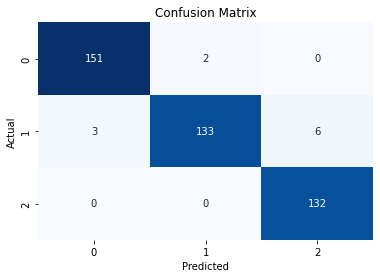

In [46]:
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
